In [1]:
import os
import urllib.request
from species import SpeciesInit
from species.data.database import Database
from species.fit.fit_model import FitModel
from species.read.read_model import ReadModel
from species.plot.plot_mcmc import plot_posterior
from species.plot.plot_spectrum import plot_spectrum
from species.util.box_util import update_objectbox
from species.util.fit_util import get_residuals, multi_photometry

SpeciesInit()

[osx-summer2410.stsci.edu:76848] shmem: mmap: an error occurred while determining whether or not /var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T//ompi.osx-summer2410.5976/jf.0/852754432/sm_segment.osx-summer2410.5976.32d40000.0 could be created.


species v0.8.4

Working folder: /Users/bseamons/Documents/Research/Jupyter Notebooks/Species Notebooks

Configuration file: /Users/bseamons/Documents/Research/Jupyter Notebooks/Species Notebooks/species_config.ini
Database file: /Users/bseamons/Documents/Research/Jupyter Notebooks/Species Notebooks/species_database.hdf5
Data folder: /Users/bseamons/Documents/Research/Jupyter Notebooks/Species Notebooks/data

Configuration settings:
   - Database: /Users/bseamons/Documents/Research/Jupyter Notebooks/Species Notebooks/species_database.hdf5
   - Data folder: /Users/bseamons/Documents/Research/Jupyter Notebooks/Species Notebooks/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [2]:
database = Database()
database.available_models()


-----------------------
Available model spectra
-----------------------

   - AMES-Cond:
      - Label = ames-cond
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [100, 6600]
      - Wavelength range (um): [0.5, 40]
      - Sampling (lambda/d_lambda): 4000
      - File size: 150 MB

   - AMES-Dusty:
      - Label = ames-dusty
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [500, 4000]
      - Wavelength range (um): [0.5, 40]
      - Sampling (lambda/d_lambda): 4000
      - File size: 58 MB

   - ATMO:
      - Label = atmo
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavelength range (um): [0.4, 6000]
      - Sampling (lambda/d_lambda): 1000
      - File size: 45 MB
      - Reference: Phillips et al. (2020)
      - URL: https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P

   - ATMO CEQ:
      - Label = atmo-ceq
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavele

{'ames-cond': {'parameters': ['teff', 'logg'],
  'name': 'AMES-Cond',
  'file size': '150 MB',
  'wavelength range': [0.5, 40],
  'lambda/d_lambda': 4000,
  'teff range': [100, 6600]},
 'ames-dusty': {'parameters': ['teff', 'logg'],
  'name': 'AMES-Dusty',
  'file size': '58 MB',
  'wavelength range': [0.5, 40],
  'lambda/d_lambda': 4000,
  'teff range': [500, 4000]},
 'atmo': {'parameters': ['teff', 'logg'],
  'name': 'ATMO',
  'file size': '45 MB',
  'wavelength range': [0.4, 6000],
  'lambda/d_lambda': 1000,
  'teff range': [200, 3000],
  'reference': 'Phillips et al. (2020)',
  'url': 'https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P'},
 'atmo-ceq': {'parameters': ['teff', 'logg'],
  'name': 'ATMO CEQ',
  'file size': '455 MB',
  'wavelength range': [0.2, 6000],
  'lambda/d_lambda': 10000,
  'teff range': [200, 3000],
  'reference': 'Phillips et al. (2020)',
  'url': 'https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P'},
 'atmo-neq-weak': {'parameters': ['teff', 'logg']

In [3]:
database.add_model(model = 'lacy2023-cloudy-thin-neq')


-------------------------
Add grid of model spectra
-------------------------

Database tag: lacy2023-cloudy-thin-neq
Model name: coolTLUSTY thin clouds NEQ



100%|█████████████████████████████████████| 69.8M/69.8M [00:00<00:00, 66.5GB/s]
SHA256 hash of downloaded file: c5c2fb23e15ec6eb950a46e6f306d701f5caae0bfabe8335ccd6a19a8aebeb7d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.



Unpacking 176/176 model spectra from coolTLUSTY thin clouds NEQ (67 MB)...

/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/data_util.py:73: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path, members=member_list, numeric_owner=numeric_owner)


 [DONE]

Please cite Lacy & Burrows (2023) when using coolTLUSTY thin clouds NEQ in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2023ApJ...950....8L

Wavelength range (um) = 0.45 - 299.5
Sampling (lambda/d_lambda) = 4000
Teff range (K) = 200 - 450

Adding coolTLUSTY thin clouds NEQ model spectra... data/lacy2023-cloudy-thin-neq/lacy2023-cloudy-thin-neq_teff_450_logg_4.75_feh_-0.5_spec.npy

Grid points stored in the database:
   - Teff = [200. 225. 250. 275. 300. 325. 350. 375. 400. 425. 450.]
   - log(g) = [3.5  3.75 4.   4.25 4.5  4.75 5.  ]
   - [Fe/H] = [-0.5  0.   0.5]

Number of grid points per parameter:
   - teff: 11
   - logg: 7
   - feh: 3

Number of stored grid points: 231
Number of interpolated grid points: 0
Number of missing grid points: 0


In [4]:
database.add_object('WISE J225540', parallax = (70.7, 4.2), flux_density = None,
                    spectrum = {'MOSFIRE': ('/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118_spex_res_species_units.txt', None, 120.)}, deredden = None)


----------
Add object
----------

Object name: WISE J225540
Units: None
Deredden: None
Parallax (mas) = 70.70 +/- 4.20

Spectra:
   - Spectrum:
      - Database tag: MOSFIRE
      - Filename: /Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118_spex_res_species_units.txt
      - Data shape: (6122, 3)
      - Wavelength range (um): 1.11 - 2.40
      - Mean flux (W m-2 um-1): 1.15e-24
      - Mean error (W m-2 um-1): 2.83e-26
   - Instrument resolution:
      - MOSFIRE: 120.0


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/data/database.py:1399: UserWarning: Transposing the data of MOSFIRE because the first instead of the second axis has a length of 3.
  warnings.warn(


In [5]:
fit = FitModel(object_name = 'WISE J225540', model = 'lacy2023-cloudy-thick-neq',
               bounds = {'logg': (3.5, 5.5)})


-----------------
Fit model spectra
-----------------

Object name: WISE J225540
Model tag: lacy2023-cloudy-thick-neq
Binary star: False
Blackbody components: 0
Teff interpolation range: (200.0, 450.0)

Interpolating MOSFIRE... [DONE]

Fitting 5 parameters:
   - teff
   - logg
   - feh
   - radius
   - parallax

Uniform priors (min, max):
   - logg = (3.5, 5.0)
   - teff = (200.0, 450.0)
   - feh = (-0.5, 0.5)
   - radius = (0.5, 5.0)

Normal priors (mean, sigma):
   - parallax = 70.70 +/- 4.20

Weights for the log-likelihood function:
   - MOSFIRE = 1.00


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/fit/fit_model.py:639: UserWarning: The upper bound on logg (5.5) is larger than the upper bound from the available lacy2023-cloudy-thick-neq model grid (5.0). The bound of the logg prior will be adjusted to 5.0.
  warnings.warn(


In [6]:
fit.run_multinest(tag = 'WISE J225540', n_live_points = 500)


------------------------------
Nested sampling with MultiNest
------------------------------

Database tag: WISE J225540
Number of live points: 500
Resume previous fit: False
Output folder: multinest/

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  500
 dimensionality =    5
 *****************************************************


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 23;
tau: [24.81663605]


  analysing data from multinest/.txt ln(ev)=  -14964264.826734660      +/-   7.1153628840060101E-002
 Total Likelihood Evaluations:         3854
 Sampling finished. Exiting MultiNest


Nested sampling global log-evidence: -14964264.83 +/- 0.07
Nested importance sampling global log-evidence: -14964265.58 +/- 0.05

Sample with the maximum likelihood:
   - Log-likelihood = -14964261.77
   - teff = 425.49
   - logg = 3.91
   - feh = 0.47
   - radius = 3.45
   - parallax = 70.70

---------------------
Add posterior samples
---------------------

Database tag: WISE J225540
Sampler: multinest
Samples shape: (1156, 5)
Ln(Z): -14964264.83 +/- 0.07

Integrated autocorrelation time:
   - teff: 5.08
   - logg: 24.82
   - feh: 4.42
   - radius: 20.31
   - parallax: 4.00



---------------------
Get posterior samples
---------------------

Database tag: WISE J225540
Random samples: None
Samples shape: (1156, 5)

Parameters:
   - teff
   - logg
   - feh
   - radius
   - parallax

Uniform priors (min, max):
   - feh = (-0.5, 0.5)
   - logg = (3.5, 5.0)
   - radius = (0.5, 5.0)
   - teff = (200.0, 450.0)

Normal priors (mean, sigma):
   - parallax = (70.7, 4.2)

----------------------------
Plot posterior distributions
----------------------------

Database tag: WISE J225540
Object type: planet
Manual parameters: None

Median parameters:
   - teff = 4.37e+02
   - logg = 4.29e+00
   - feh = 2.41e-01
   - radius = 3.12e+00
   - parallax = 7.12e+01

Sample with highest probability:
   - teff = 4.25e+02
   - logg = 3.91e+00
   - feh = 4.74e-01
   - radius = 3.45e+00
   - parallax = 7.07e+01


/opt/miniconda3/envs/species/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/miniconda3/envs/species/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/miniconda3/envs/species/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


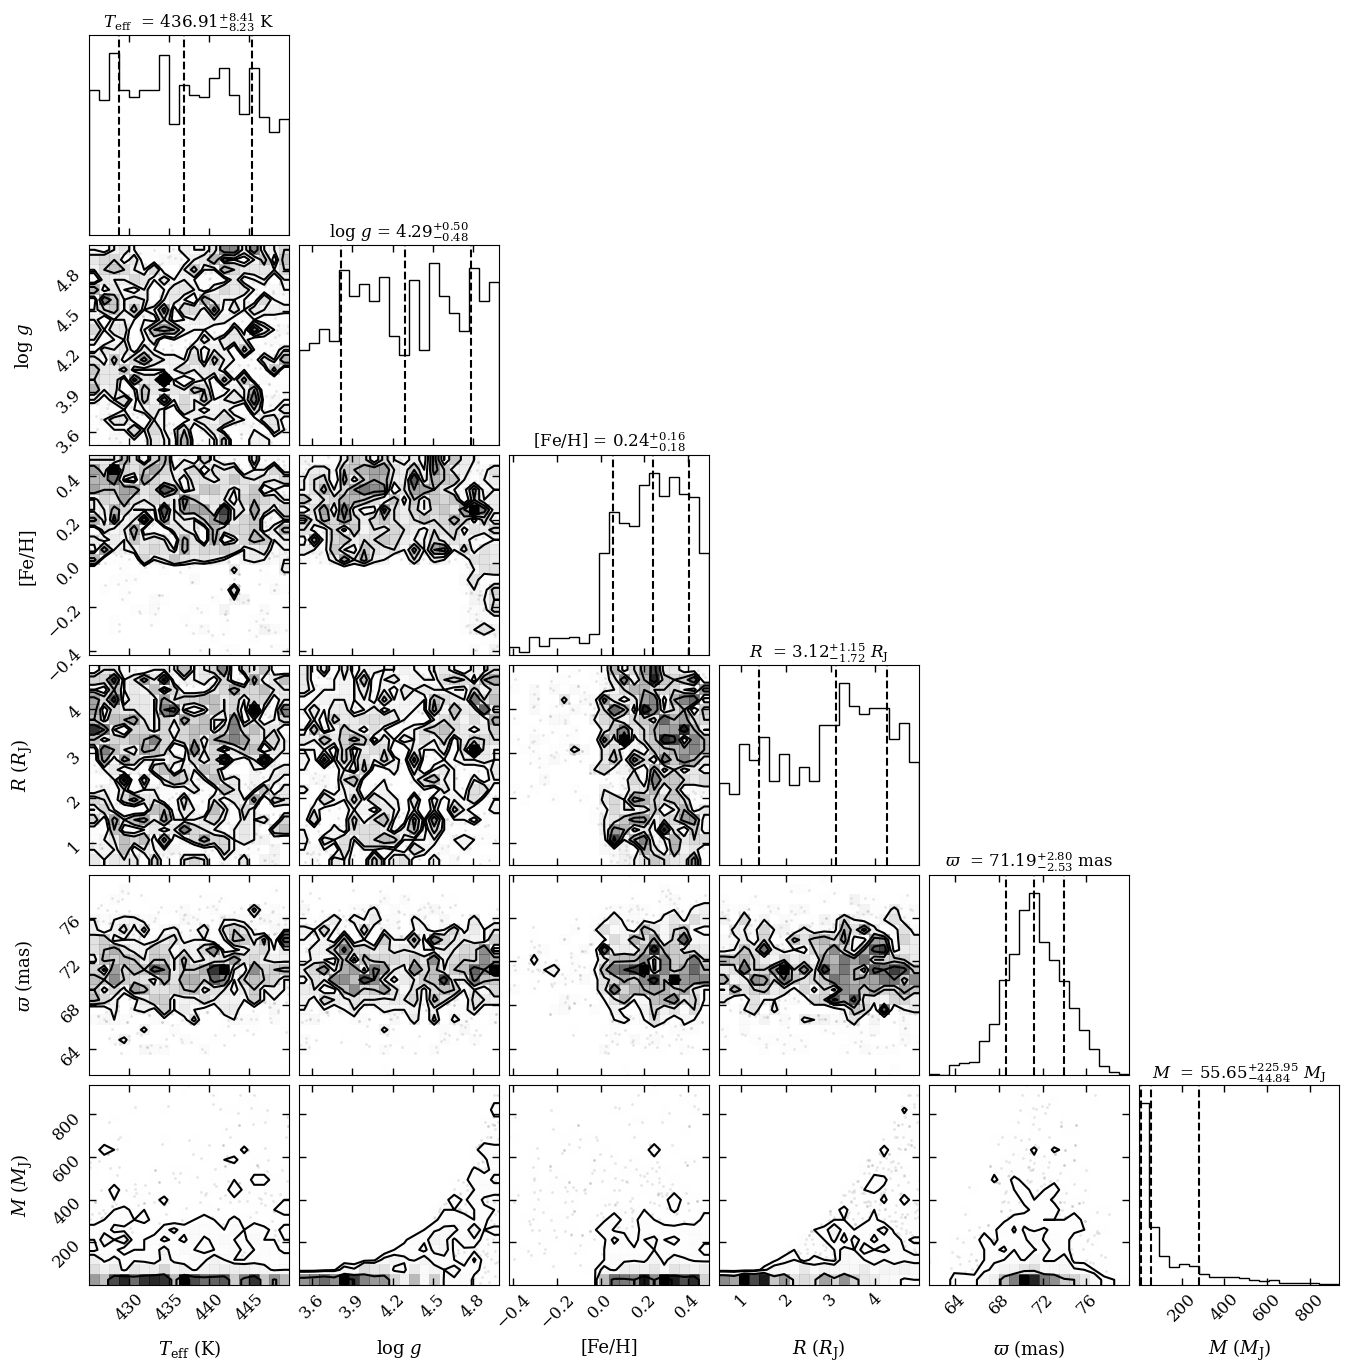

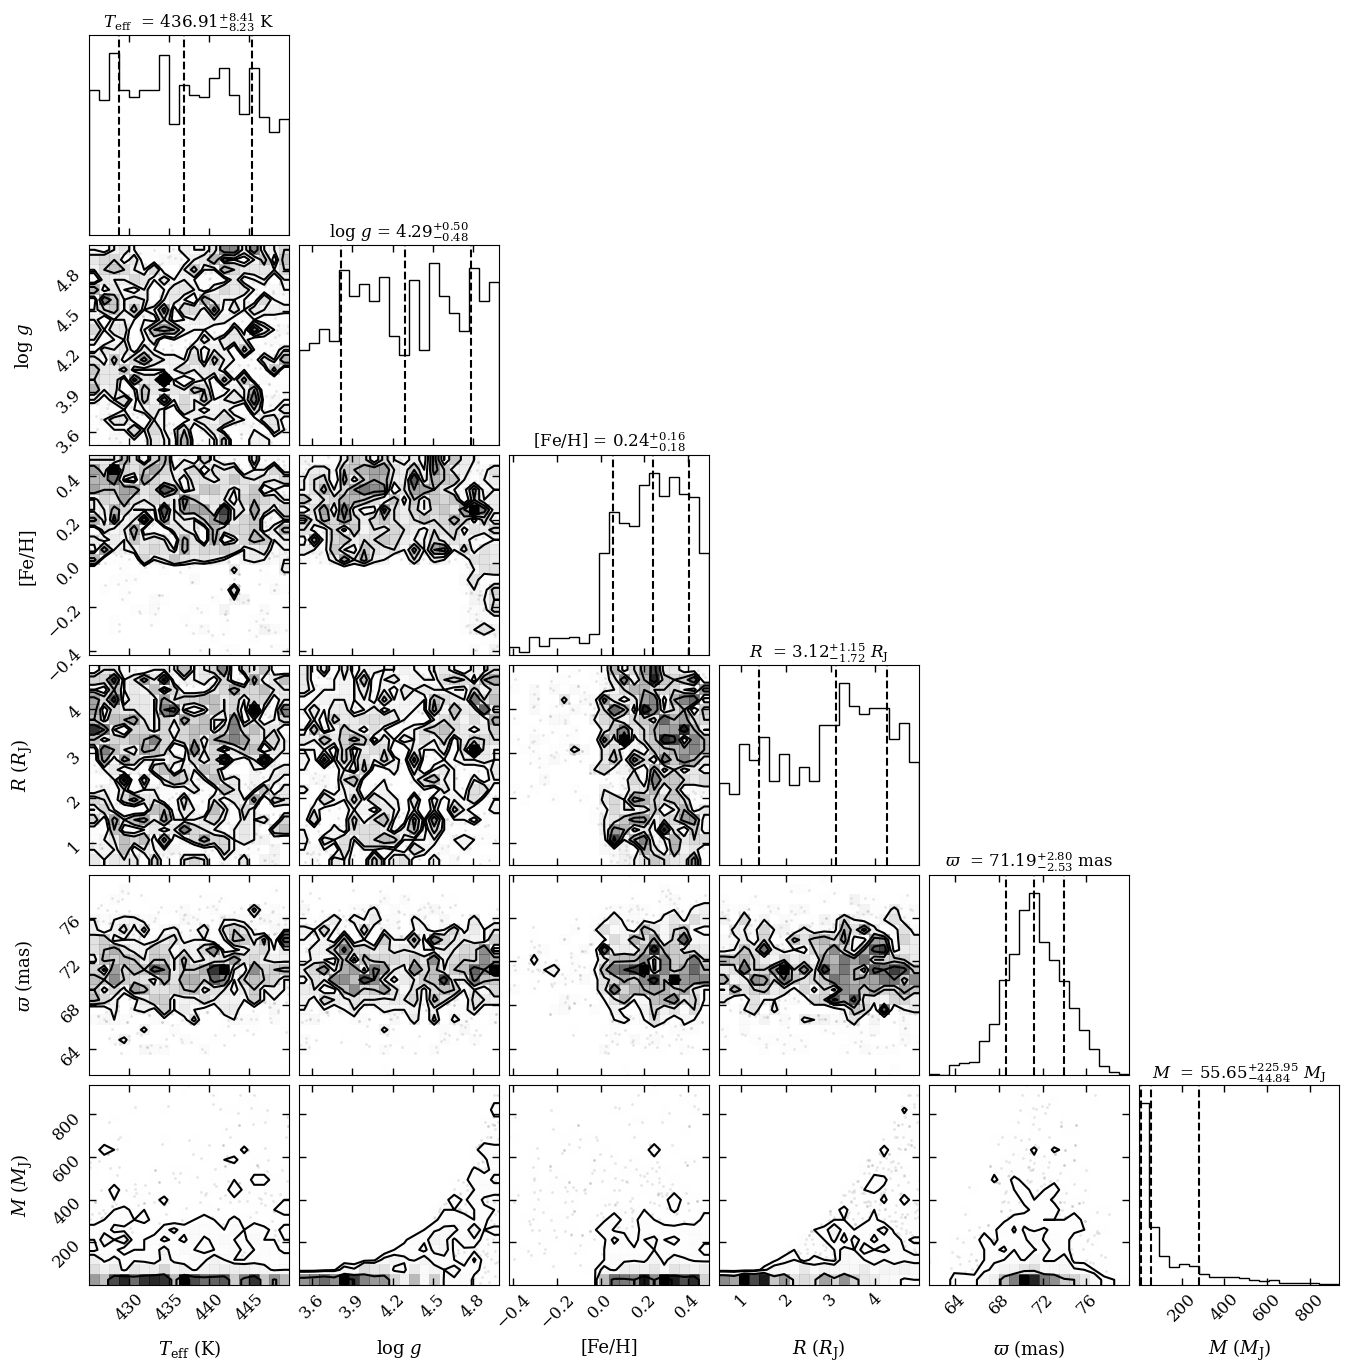

In [7]:
plot_posterior(tag = 'WISE J225540', inc_mass = True, output = None, title_fmt = ['.2f', '.2f', '.2f', '.2f', '.2f', '.2f'])

In [8]:
samples = database.get_mcmc_spectra(tag = 'WISE J225540', random = 30, wavel_range = None)


---------------------
Get posterior spectra
---------------------

Database tag: WISE J225540
Number of samples: 30
Wavelength range (um): None
Resolution: None



  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
best = database.get_median_sample(tag = 'WISE J225540')


---------------------
Get median parameters
---------------------

Database tag: WISE J225540

Parameters:
   - teff = 436.91
   - logg = 4.29
   - feh = 0.24
   - radius = 3.12
   - parallax = 71.19


In [10]:
read_model = ReadModel(model = 'lacy2023-cloudy-thin-neq', wavel_range = None)

In [11]:
modelbox = read_model.get_model(model_param = best, spec_res = 120., smooth = True)

/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/read/read_model.py:613: DeprecationWarning: The 'smooth' parameter has been deprecated. Please set only the 'spec_res' argument, which can be set to None for not applying a smoothing.
  warnings.warn(


In [12]:
objectbox = database.get_object(object_name = 'WISE J225540', inc_spec = True)


----------
Get object
----------

Object name: WISE J225540
Include photometry: True
Include spectra: True


In [13]:
objectbox = update_objectbox(objectbox = objectbox, model_param = best)


----------------
Update ObjectBox
----------------



In [14]:
residuals = get_residuals(tag = 'WISE J225540', datatype = 'model', spectrum = 'lacy2023-cloudy-thin-neq', parameters = best, objectbox = objectbox, inc_spec = True)


-------------------
Calculate residuals
-------------------


Model: lacy2023-cloudy-thick-neq
Binary: False

Model parameters:
   - teff
   - logg
   - feh
   - radius
   - parallax

Fixed parameters: none

Include photometry: True
Include spectra: True

Residuals (sigma):
   - MOSFIRE: min = -1.54, max = 232.81

Number of data points = 6122
Number of model parameters = 5
Number of fixed parameters = 0
Number of degrees of freedom = 6117

chi2 = 30637540.60
reduced chi2 = 5008.59


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/fit_util.py:267: DeprecationWarning: The 'datatype' parameter is no longer used by the 'get_residuals' function. Instead, the 'tag' parameter should be set, which points to the sampling results as stored in the database.
  warnings.warn(
/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/fit_util.py:277: DeprecationWarning: The 'spectrum' parameter is no longer used by the 'get_residuals' function. Instead, the 'tag' parameter should be set, which points to the sampling results as stored in the database.
  warnings.warn(



-------------
Plot spectrum
-------------

Boxes:
   - ObjectBox
   - ModelBox

Object type: star
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: None

Figure size: (20, 12)
Legend parameters: None
Include model name: False


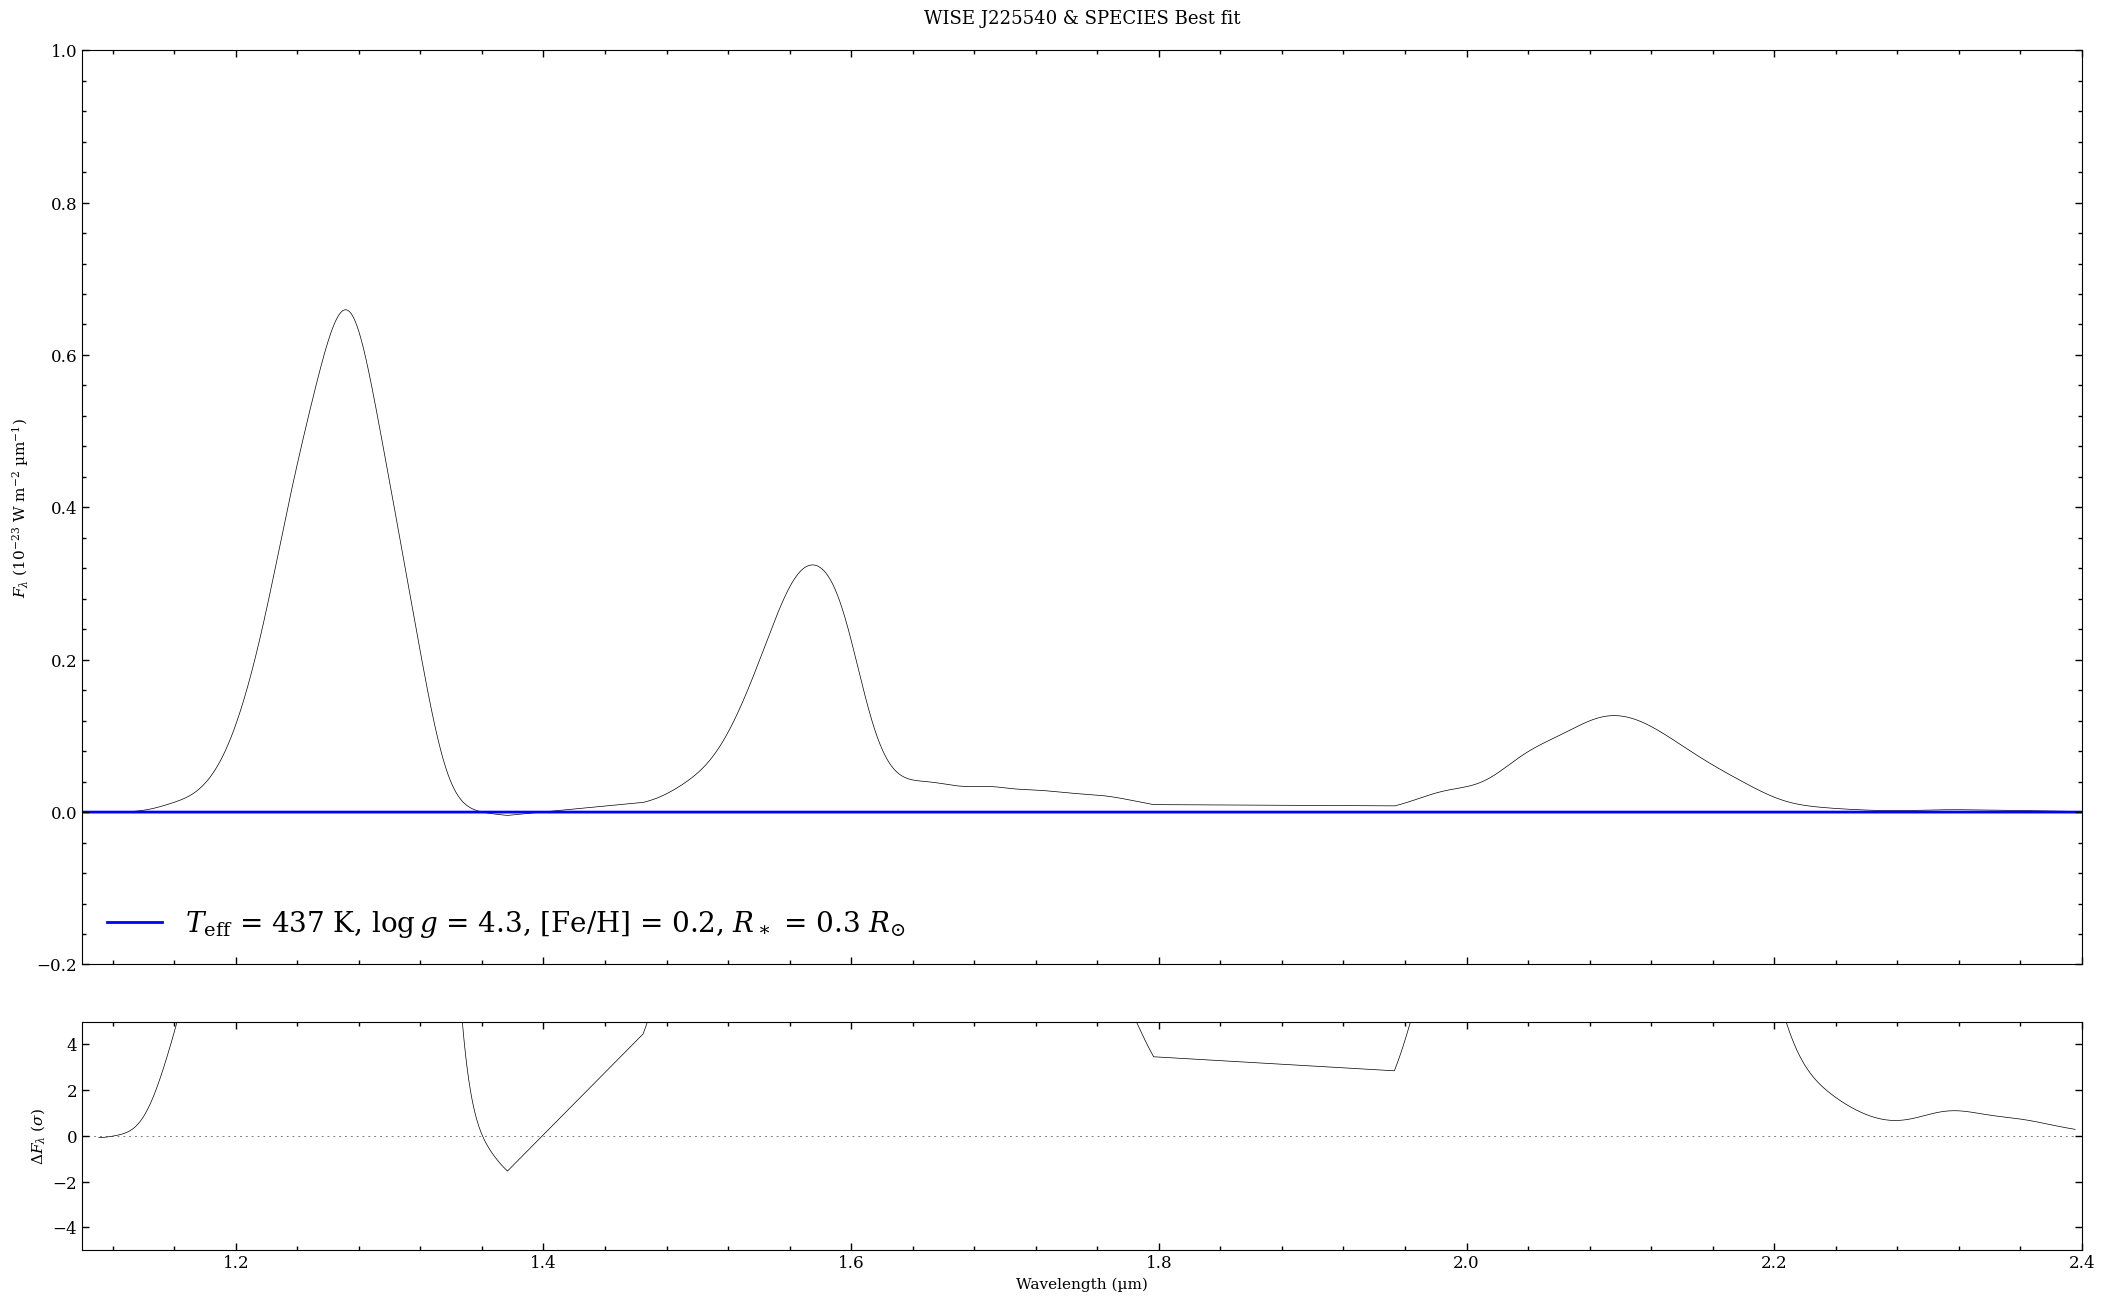

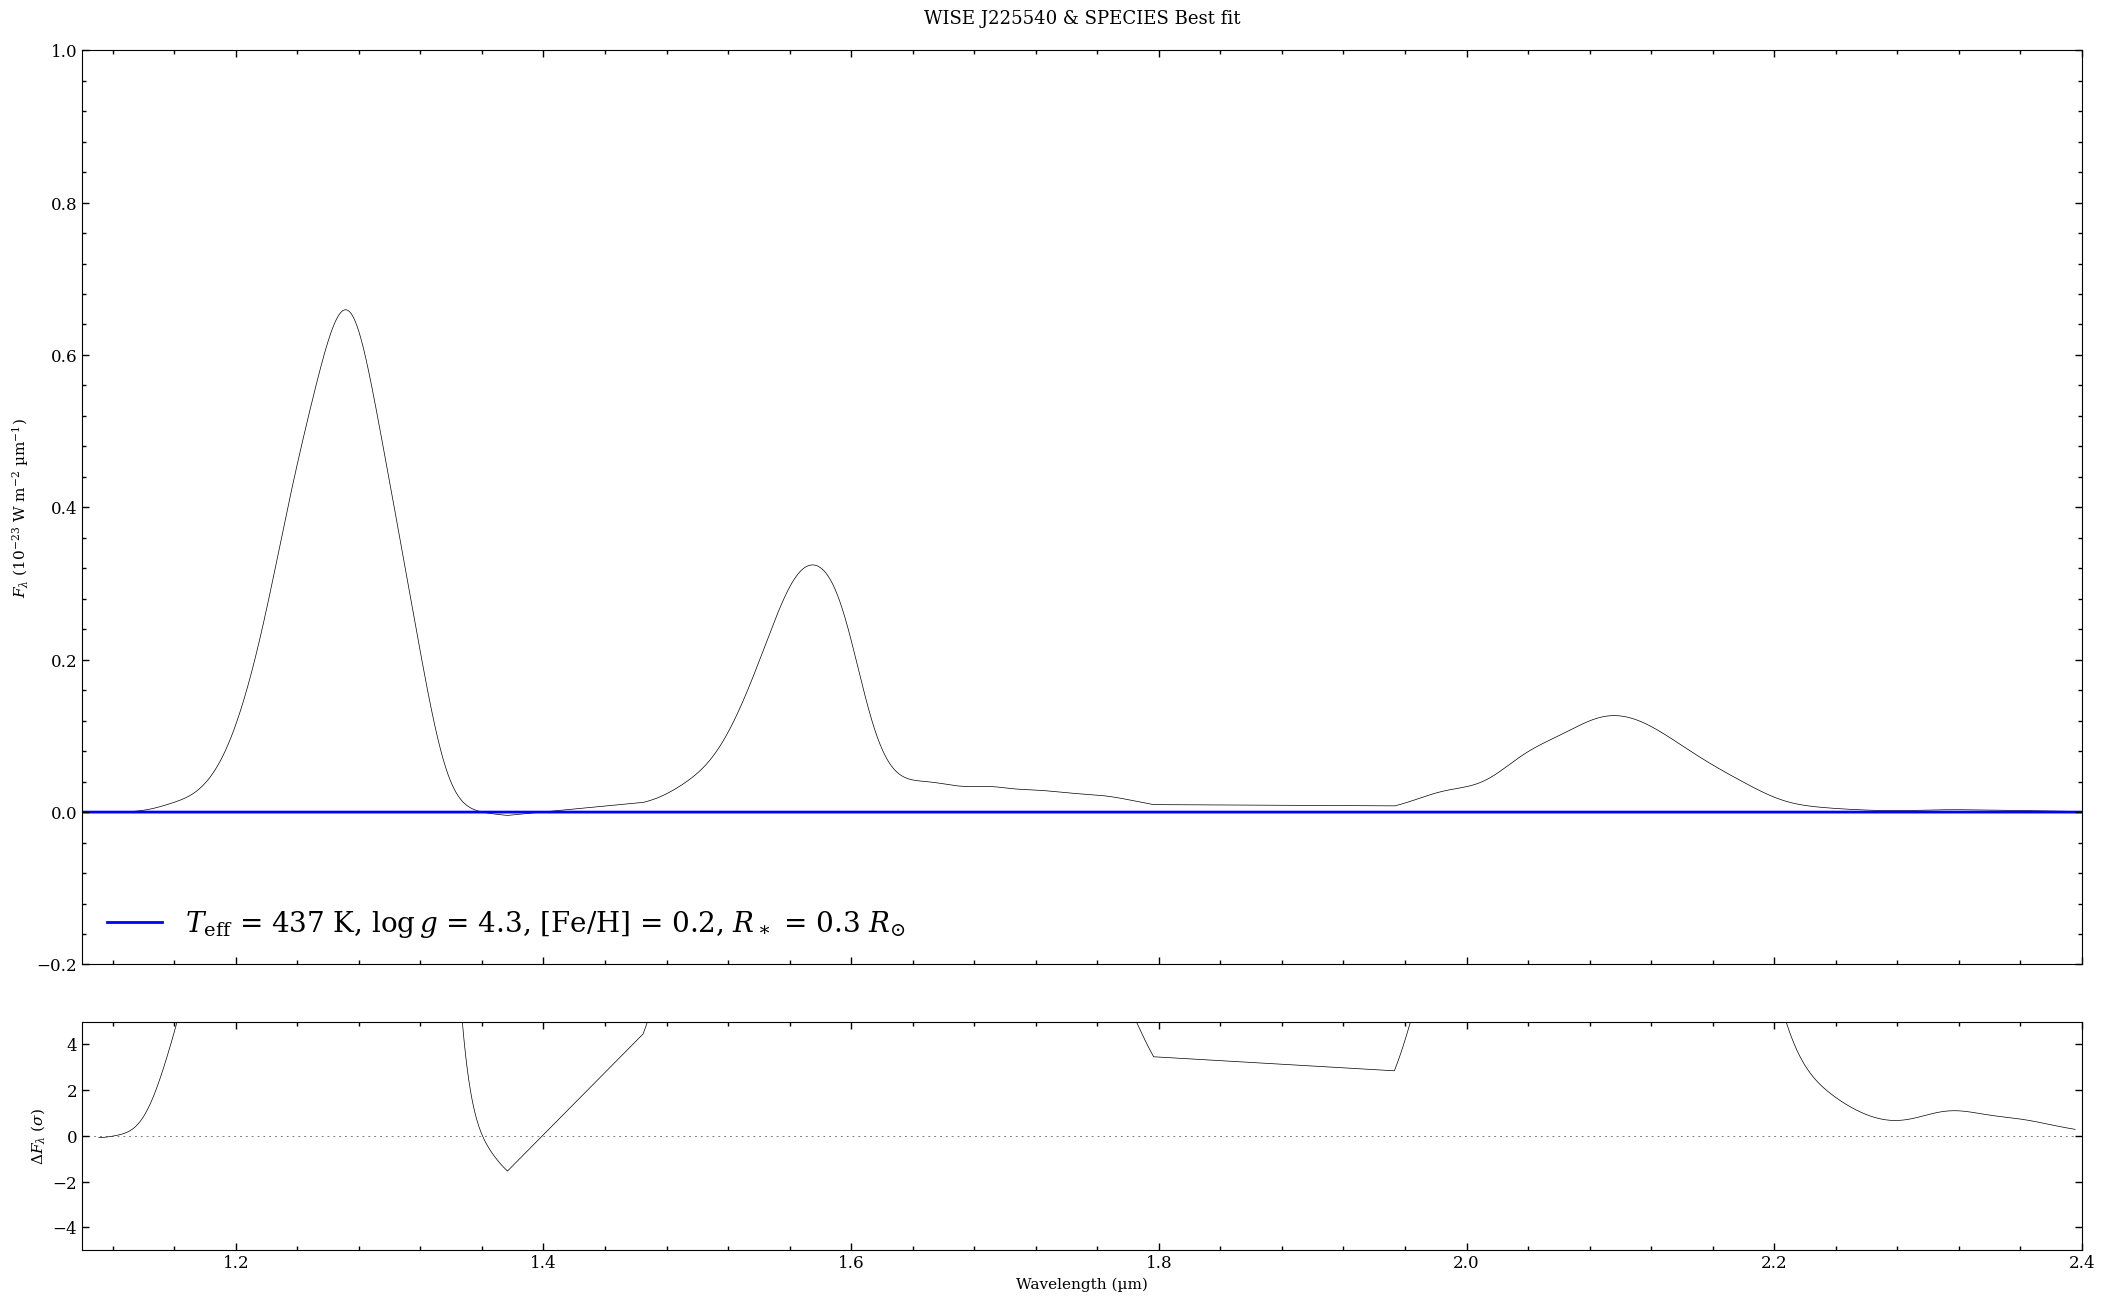

In [15]:
plot_spectrum(boxes = [objectbox, modelbox], quantity = 'flux density', object_type = 'star', residuals = residuals,
              plot_kwargs = [{'MOSFIRE': {'ls': '-', 'lw': 0.5, 'color': 'black'}}, {'ls': '-', 'lw': 2., 'color': 'blue'}],
              legend = [{'loc': 'lower left', 'frameon': False, 'fontsize': 20}, {'loc': 'lower left', 'frameon': False, 'fontsize': 20}],
              output = None, title = 'WISE J225540 & SPECIES Best fit', xlim = (1.1, 2.4), ylim = (-2e-24, 1e-23), figsize = (20, 12))

In [16]:
import numpy as np
model_array = np.array([modelbox.wavelength, modelbox.flux]).T
savepath = './species_bestfit_lacy2023-cloudy-thin-neq_spexres_model_BAD.txt'
np.savetxt(savepath, model_array)